* Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Or, alternatively, **Restart & Run All**.

* Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

* You can always add additional cells to the notebook to experiment, to test your answers, or to provide additional support for your answers.

* You should not need to install new packages to complete an assignment. If you use any packages not available via the MATH405 `Project.toml` then your assignment will likely not be graded correctly.

* Submissions are only accepted via CANVAS!

* Late submissions: within 24h I will reduce the grade to 70%. I will not accept submissions after 24h. Please manage your time well and complete the assignments with plenty of buffer time.

* By entering your name below you confirm that you have completed this assignment on your own and without (direct) help from your colleagues. Plagiarism / copying will be checked by comparing assignments and by by testing understanding in workshops and the oral exam (final). I reserve the option to downgrade an assignment at any point.

In [1]:
NAME = "William Choi"

"William Choi"

---

# MATH 405/607 

# Numerical Methods for Differential Equations

## Assignment 3: ODEs


#### Notes

* **Due date:** Tue Nov 3, 2020, 1200 noon
* From here on all questions will count towards the grade, i.e. to get 100% you will need to answer all questions.
* Note also that this assignment is worth 14% of the overall grade (A1, A2 were 12% each, A4 will likely be 10%)

In [2]:
include("math405.jl")

 Activating environment at `~/Desktop/math405_2020W/assignments/A3/Project.toml`


### Question 1 [10]

Implement Kutta's third-order method which has Butcher tableau
$$\begin{array}{c|ccc} 
    0 &   &   &   \\ 
    1/2 & 1/2 &   &   \\ 
    1 & -1 & 2 &     \\ 
    \hline 
      & 1/6 & 2/3  & 1/6 
\end{array}$$ 

The function you implement must have the signature `kutta3(f, u0, h, Tfinal)` and return `U, t`, as in the lectures; use the model given in the answer cell!


In [3]:

function kutta3(f, u0, h, Tf)
    t = 0.0:h:Tf 
    # make sure that h and Tf are compatible!
    @assert t[end] ≈ Tf     
    U = zeros(length(u0), length(t))
    U[:, 1] = u0 
    # ------------------------------------
    # YOUR CODE HERE
    # ------------------------------------
    for i in 1:length(t)-1
        k1 = h*f(t[i], U[:,i])
        k2 = h*f(t[i]+0.5*h, U[:,i]+0.5*k1)
        k3 = h*f(t[i]+h, U[:,i]-k1+2*k2)
        U[:,i+1] = U[:,i]+(1/6)*k1+(2/3)*k2+(1/6)*k3
    end

    return U, t
end 

kutta3 (generic function with 1 method)

If you wish you may write a test to check the correctness of your implementation in the cell below. E.g.,  you could use a model from the lectures, or from this assignment or pick your own. Test against an exact solution or against the Julia ODE suite. If your tests don't pass, maybe try first to make them pass with the `euler` and `ieuler` codes from the lectures. That way you can determine whether your the bug is in your code or in your tests.

NOTE: This cell is "manually graded" but there are 0 points available. You will not be penalized if you don't complete this task!

In [ ]:
# YOUR CODE HERE

### Question 2 [5+5+5+5]

Read the documentation on [choices of ODE solvers](https://diffeq.sciml.ai/dev/solvers/ode_solve/) then solve the following IVPs, first with your `kutta3` method, and then with an adaptive ODE solver from this package.  In each case ensure that the solution is accurate to at least 4 digits. The solutions must be stored as `soln_x` and `mysoln_x` where `x = a, b, c, d`
```julia 
soln_a = solve(ODEProblem(...    # adaptive solver solution 
mysoln_a = kutta3(...  # kutta3 solution 
soln_b = ... 
```
Make sure you convert the scalar systems to vectorial ones.

(a) 
$$ 
    \dot{x}(t) = -  x(t)^2, \qquad x(0) = 1, t \in (0, 1)
$$

(b) 
$$ 
    (1+t^3) x(t) \dot{x}(t) = t^2, \qquad x(0) = 1, t \in (0, 3)
$$


(c) The Fitzhugh–Nagumo equations are a simple model of the repeated firing of a neuron. They are given by
$$\begin{aligned} 
    \dot{v}_1 &= - v_1 (v_1 - 1) (v_1 - a) - v_2 + I, \\ 
    \dot{v}_2 &=  \epsilon (v_1 - \gamma v_2).
\end{aligned}$$
Assume $v_1(0) = 0.5, v_2(0) = 0.1, a = 0.1, \epsilon = 0.008, \gamma = 1, I = 0.055$. Solve for $t \in (0, 600)$.


(d) First convert to a first-order system using the canonical substitution $u_1 = x, u_2 = \dot{x}$,
$$
    0.1 \ddot{x} + \dot{x} = - 10 x^2 +  e^{-t}, \qquad x(0) = 1, \dot{x}(0) = 0, \qquad t \in (0, 10)
$$





**NOTE:** Think about managing your computational resources, i.e., use a method that is suitable for the desired accuracy and set the tolerance to a reasonable value. I won't reduce your score against this issue, but it is useful for you if you can give it some thought.

In [6]:
# PART (a)
f_a(t,u) = -u.^2 
u0_a = [1]

soln_a = solve(ODEProblem((u,p,t) -> f_a(t, u), u0_a, (0.0, 1.0)), Tsit5(), abstol=1e-5)
mysoln_a = kutta3(f_a, u0_a, 0.1, 1.0)
refsol_a = t -> 1/(1+t)
tolerance_a = abs(refsol_a(1.0) - mysoln_a[1][end])
@show tolerance_a

# PART (b)
f_b(t,u) = t^2/(1+t^3) ./ u
u0_b = [1]

soln_b = solve(ODEProblem((u,p,t) -> f_b(t, u), u0_b, (0.0, 3.0)), Tsit5(), abstol=1e-5)
mysoln_b = kutta3(f_b, u0_b, 0.1, 3.0)
tolerance_b = abs.(soln_b(3.0) - mysoln_b[1][:,end])
@show tolerance_b

# PART (c)
const α = 0.1; const ϵ = 0.008; const γ = 1; const I = 0.055
f_c(t,v) = [-v[1]*(v[1]-1)*(v[1]-α)-v[2]+I, ϵ*(v[1]-γ*v[2])]
v0_c = [0.5, 0.1]

soln_c = solve(ODEProblem((v,p,t) -> f_c(t, v), v0_c, (0.0, 600.0)), Tsit5(), abstol=1e-5)
mysoln_c = kutta3(f_c, v0_c, 0.01, 600.0)
tolerance_c = abs.(soln_c(600.0) - mysoln_c[1][:,end])
@show tolerance_c

# PART (d)
f_d(t,u) = [u[2],-100*u[1]^2-10*u[2]+10*exp(-t)]
u0_d = [1,0]

soln_d = solve(ODEProblem((u,p,t) -> f_d(t, u), u0_d, (0.0, 10.0)), Tsit5(), abstol=1e-5)
mysoln_d = kutta3(f_d, u0_d, 0.1, 10.0)
tolerance_d = abs.(soln_d(10.0) - mysoln_d[1][:,end])
@show tolerance_d


tolerance_a = 1.9337408545039292e-5
tolerance_b = [5.4985939699214725e-6]
tolerance_c = [0.0002038597388221569, 8.630130814553383e-5]
tolerance_d = [6.321394195249463e-8, 1.1699595547994164e-6]


2-element Array{Float64,1}:
 6.321394195249463e-8
 1.1699595547994164e-6

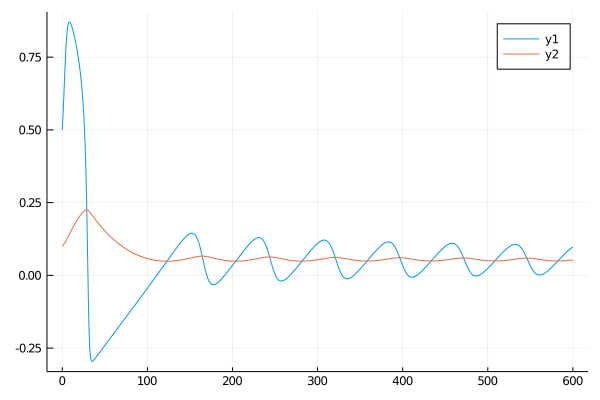

In [7]:
# Scratch Board with some plots

# # plot(refsol_a,[0.0:0.1:1.0])
# plot(t, vec(mysoln_a))
# plot!(t, refsol_a)
# plot!(soln_a)

plot(mysoln_c[2], [mysoln_c[1][1,:], mysoln_c[1][2,:]])
# plot!(soln_e)

# mysoln_c

### Question 3 [5]

Find the reference (i.e. the journal article) for the `Tsit5()` solver and post it here. Summarize in 1-2 sentences why `Tsit5()` is the recommended default solver for `OrdinaryDiffEq.jl`.


Generally speaking, higher order methods are more appropriate when one needs non-trivial errors. For instance, Euler's method doesn't scale well for high tolerances. Tsitouras 4/5 method is an adaptive RK method that finds a near optimal step size leading to reduced computation time while remaining below the user specified threshold. Dormand-Prince method is another such method that's currently the default in several ODE solvers (MATLAB, etc). However, as outlined in the paper below, Tsitouras 4/5 makes fewer simplifying assumptions and outperforms other adaptive methods.

Here is the link to the Tsitouras paper: http://users.uoa.gr/~tsitourasc/RK54_new_v2.pdf


**Reference:**
Tsitouras, C. (2011). Runge–Kutta pairs of order 5 (4) satisfying only the first column simplifying assumption. Computers & Mathematics with Applications, 62(2), 770-775.

### Question 4 [5+10+5]

Consider van der Pol's oscillator,  
$$
    \ddot{x} - \mu (1-x^2) \dot{x} + x = 0. 
$$

(a) Use the Lienard transform,
$$ 
    y = x - x^3 / 3 - \dot{x} / \mu 
$$
to convert it to a first-order system
$$\begin{aligned}
    \dot{x} &= f_1(x, y) \\ 
    \dot{y} &= f_2(x, y)
\end{aligned}$$
for $u = (u_1, u_2) = (x, y)$. Implement this system as a function 
```julia 
f_vdp(u, p, t) = [ ..., 
                   ... ]
```
where `p` is the value of the parameter $\mu$.

In [10]:
# Solution part (a)

# YOUR CODE HERE

# Take a derivative of y and substitute the expression for x" 
f_vdp(u, p, t) = [p*(u[1]-(u[1]^3)/3-u[2]), u[1]/p]


f_vdp (generic function with 1 method)

(b) Solve the VDP equation as the first order system implemented in (a) with initial condition $(x_0, y_0) = (1, 0)$ and parameters $\mu = 2$ and $\mu = 8$, and for $0 \leq t \leq 50$. Produce phase space plots for both trajectories in a single figure. Try to make the figure close to publication quality (labels, axis, formatting, etc)

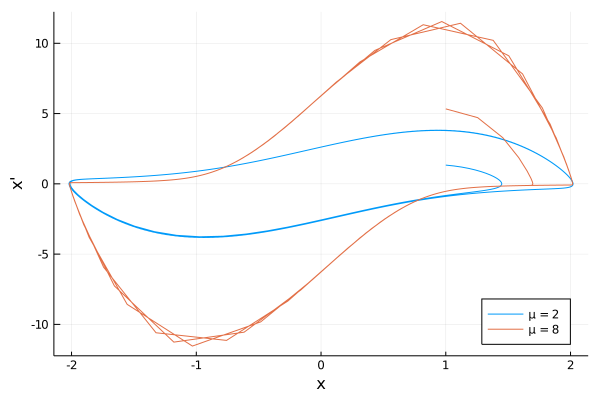

In [14]:
# Solution part (b)

# YOUR CODE HERE
const μ1 = 2.0; const μ2 = 8.0
u0 = [1.0,0.0]
tspan = (0.0,50.0)

f1(t,u) = f_vdp(u,μ1,t)
f2(t,u) = f_vdp(u,μ2,t)
soln1 = solve(ODEProblem((u,p,t)->f1(t,u), u0, tspan), Rodas5())
soln2 = solve(ODEProblem((u,p,t)->f2(t,u), u0, tspan), Rodas5())

soln_dist(soln, t) = soln(t)[1]
soln_vel(soln, μ, t) = μ*(- soln(t)[2] + soln(t)[1] - (soln(t)[1]^3)/3)

soln_d1(t) = soln_dist(soln1,t)
soln_v1(t) = soln_vel(soln1, μ1, t)
soln_d2(t) = soln_dist(soln2,t)
soln_v2(t) = soln_vel(soln2, μ2, t)

time = 0.0:0.05:50.0
dist1 = soln_d1.(time)
vel1 = soln_v1.(time)
dist2 = soln_d2.(time)
vel2 = soln_v2.(time)

plot(dist1, vel1, label="μ = 2",legend=:bottomright)
plot!(dist2, vel2, label="μ = 8")
xlabel!("x")
ylabel!("x'")

(c) For each of the two cases $\mu = 2, 8$ decide whether the problem is stiff. Explain your reasoning. You can use the code cell below to experiment and can reference the results of these experiments in your solution. [The code cell as 0-score attached, so you won't be graded against that code, but only against  your answer in the text cell.]

Note this question can have a very brief answer or a more in-depth investigation. For a particularly nice discussion we can give bonus points.

In [109]:
# Use this cell if you want to run some additional to support your answer below.
soln1 = solve(ODEProblem((u,p,t) -> f2(t,u),u0,tspan), Tsit5(), abstol=1e-6)
soln2 = solve(ODEProblem((u,p,t) -> f2(t,u),u0,tspan), Rodas5(), abstol=1e-6)


# YOUR CODE HERE
# soln_test = kutta3(f2,u0,0.1,50.0)
@time soln1 = solve(ODEProblem((u,p,t) -> f1(t,u),u0,tspan), Tsit5(), abstol=1e-6)
@show length(soln1.t);
@time soln2 = solve(ODEProblem((u,p,t) -> f1(t,u),u0,tspan), Rodas5(), abstol=1e-6)
@show length(soln2.t);

times = """
Tsit5: $t1
Rodas5: $t2
"""
print(times)


  2.323903 seconds (2.24 M allocations: 113.158 MiB, 1.57% gc time)
length(soln1.t) = 149
  3.195422 seconds (2.89 M allocations: 148.689 MiB, 2.03% gc time)
length(soln2.t) = 182
Tsit5: 2.991714384
Rodas5: 2.828454672


([1.0 1.2666666666666666 … 1.0780289290963887 0.9015487927906972; 0.0 0.1 … 1.101620133585058 1.2094230264946968], 0.0:0.2:50.0)

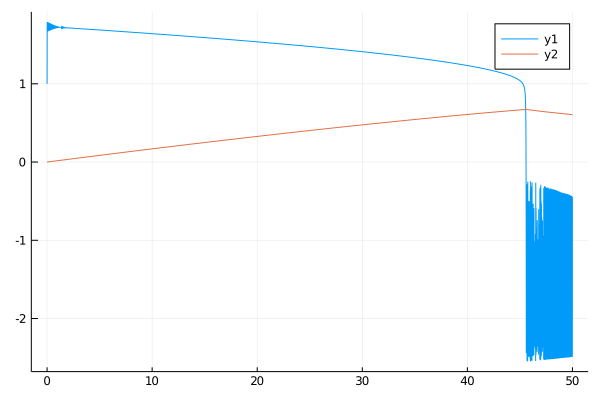

In [107]:
function euler(f, u0, h, T)
    t = 0.0:h:T 
    U = zeros(length(u0), length(t)); U[:, 1] = u0 
    for n = 2:length(t) 
        U[:,n] = U[:,n-1] + h * f(t[n-1], U[:,n-1])
    end 
    return U, t
end

# plot(soln1)
f3(t,u) = f_vdp(u,100.0,t)
soln_euler = euler(f3,u0,0.01,50.0)
plot(soln_euler[2], [soln_euler[1][1,:],soln_euler[1][2,:]])

**Solution to part (c)**

As mentioned during class, there isn't a clear-cut definition that distinguishes stiff equations from non-stiff counterparts. Rather we can explore the degree of stiffness of problems. I've tried out a number of things above. First, I tried solving for both cases of $\mu$ using explicit euler's method. As expected, the method fails for large step sizes. The step size is restricted by the stiffness of the problem. For $\mu = 2$, the solution is stable with step sizes around 0.1 whereas for $\mu = 8$, the solution is stable for step sizes of 0.01.

This result also clearly illustrates the impact of constant $\mu$. $\dot{x}$ is roughly on the order of $\mu$ and increasing the value of $\mu$ leads to nearby solutions converging more rapidly. We can verify this by solving the same ODE with $\mu = 100$. Indeed, we observe oscillations even at step sizes of 0.001.

Another way of arriving at the same result is by comparing the performance of explicit and implicit solvers. I used Tsit5 and Rodas5 and observed the number of steps taken by each method. For $\mu = 2$, Tsit5 converges faster by taking 149 steps as opposed to 182 by Rodas5. The opposite is true for $\mu = 8$, where Tsit5 takes 252 steps while Rodas5 takes 151.

In conclusion, we can say that the case with $\mu = 8$ is more stiff than the case with $\mu = 2$.


### Question 5 [10]

A model for the (vertical) velocity $v(t)$ of a skydiver is 
$$ 
    \dot{v}(t) = - g + \frac{k}{m} v^2
$$
where $g$ is graviational acceleration, $m$ is the mass of the skydiver with parachute and $k$ quantifies the effect of air resistance. Use SI units, i.e. m/s for velocity and kg for mass. For the mass we will take $m = 100 {\rm kg}$. 

Suppose a jump starts at 1,200m with closed parachute with friction parameter $k = 0.4875~{\rm kg/m}$. After 13 seconds, the diver opens the parachute at which point the friction parameter changes to $k = 29.16~{\rm kg/m}$.

Decide what the initial condition should be! Define it in your code as 
```julia 
v0 = ... 
```
Then find the time at which the diver hits the ground, and the velocity at impact, and define them in your code as 
```julia
t_impact = ...
v_impact = ... 
```
Ensure that both are accurate to within 1% tolerance.


In [111]:
# Remember to add tolerance to Tsit5


# YOUR CODE HERE
const g = 9.81; const m = 100; const k1 = 0.4875; const k2 = 29.16

# First Interval: Solving ODE for t = (0,13)
v0 = [1200,0] # [u0, v0]
tspan1 = (0.0, 13.0)
f1(t,u) = [u[2], -g + (k1/m)*u[2]^2]
soln1 = solve(ODEProblem((u,p,t) -> f1(t, u), v0, tspan1), Tsit5(), abstol=1e-5)


# Second Interval: Solving ODE for t = (13,t_impact)
v0 = soln1.u[end]
tspan2 = (13.0, 200.0) # select an arbitary end point large enough
f2(t,u) = [u[2], -g + (k2/m)*u[2]^2]
soln2 = solve(ODEProblem((u,p,t) -> f2(t, u), v0, tspan2), Tsit5(), abstol=1e-5)

# Use Bisection method to find the root of the distance function
d(t) = soln2(t)[1]
t_impact = find_zero(d, (130.0,150.0), Bisection())
v_impact = soln2(t_impact)[2]


# let's just do a very quick test to make sure the orders of magnitude are right! 
# If this fails then you likely havee a bug / made a wrong assumption somewhere
println(@test -10 < v_impact < 0)
println(@test 0 < t_impact < 1000)

Test Passed
Test Passed


### Question 6 - The Crank-Nicholson Method [10 + 10]

Recall the Crank-Nicholson method from the lectures: 
$$ 
    U_{n+1} = U_n + \frac{h}{2}\big( f(nh, U_n) + f((n+1)h, U_{n+1}) \big)
$$

(a) Define and estimate the truncation error. What is the order of accuracy?

(b) Compute the region of stability, and conclude that the CN method is A-stable.

**Solution to part (a)**

We can taylor expand the exact solution to obtain the following

$$
u(t_{n+1}) = u(t_n) + hu'(t_n) + \frac{h^2}{2}u^"(t_n) + \frac{h^3}{6}u^{(3)}(t_n) 
$$

We can also taylor expand $f((n+1)h, U_{n+1})$ to find an explicit expression for the numerical solution.

$$\begin{aligned}
u(t_{n+1}) &= u(t_n) + \frac{h}{2}\left( 2u'(t_n) + hu^"(t_n) + \frac{h^2}{2}u^{(3)}(t_n) \right)
&= u(t_n) + h\left( u'(t_n) + \frac{h}{2}u^"(t_n) + \frac{h^2}{4}u^{(3)}(t_n) \right)
\end{aligned}$$

$$
|u(t_{n+1}) - U_{n+1}| \approx \frac{h^3}{12}u^{(3)}(t_n) = O(h^3)
$$

Note that truncation error is defined to be the following: $u(t_n + h) = u(t_n) + h \Phi(t_n, u(t_n), h) + h T_n$.

Applying this to the expressions for $u(t_{n+1})$ above. We get the following.

$$
u(t_{n+1}) = u(t_n) + h\left( u'(t_n) + \frac{h}{2}u^"(t_n) + \frac{h^2}{4}u^{(3)}(t_n) \right) + h\left(\frac{h^2}{12}u^{(3)}(t_n)\right)
$$

Therefore, truncation error can be estimated to be the following which is of order 2.

$$
|T_n| = \frac{h^2}{12}u^{(3)}(t_n) = O(2)
$$

**Solution to part (b)**

We can verify if Crank-Nicholson method A-stable by applying it to the toy problem  $\dot{u} = \lambda u$. First we will determine the region of stability. Then, we will check if the entire left half-place $\{ z : {\rm Re} z < 0\}$ is in the stability region and therefore be A-stable.

$$\begin{aligned}
U_{n+1} &= U_n + \frac{h}{2}(\lambda U_n + \lambda U_{n+1}) \\ 
&= U_n(1+\frac{\lambda h}{2}) + \frac{\lambda h}{2}U_{n+1} \\
\end{aligned}$$

$$
(1-\frac{\lambda h}{2})U_{n+1} = (1+\frac{\lambda h}{2})U_n \\
U_{n+1} = \frac{(1+\frac{z}{2})}{(1-\frac{z}{2})}U_n
$$

Region of stability is $\left| \frac{(1+\frac{z}{2})}{(1-\frac{z}{2})} \right| < 1$.

Note that the above expression is equivalent to $\frac{|1+\frac{z}{2}|}{|1-\frac{z}{2}|} < 1$. We can rearrange the equation to be $|1+\frac{z}{2}| <|1-\frac{z}{2}|$ (stability condition). Since the imaginary term is the same on either side of the expression, the above condition only depends on $Re(z)$.

$$
1+Re(z) < 1-Re(z) \\
Re(z) < -Re(z)
$$

The above expression is satisfied when $Re(z) < 0$. Therefore, CN method is A-stable.


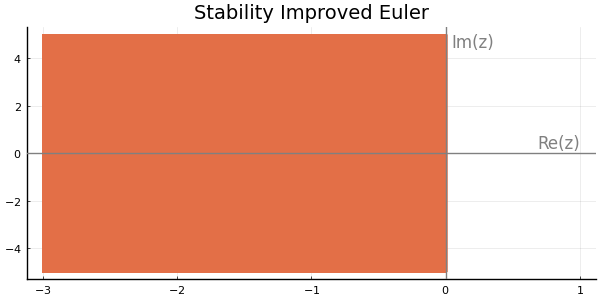

In [112]:
# We can verify the above result programmatically
Plots.pyplot()
mult = z -> (1 + z/2)/(1-z/2)
stab_ie = MATH405.levelset( [-3,1], [-5,5], (x, y) -> abs( mult(x + im * y) ), 1.0, c=2, title = "Stability Improved Euler")
plot( stab_ie, size = (600, 300) )

### Question 7 - Energy conservation [10 + 5 + 5 + 5]

Consider a harmonic oscillator, $\ddot{r} = - c r$ with Hamiltonian $H = \frac12 v^2 + \frac{c}{2} r^2$, where $c > 0$. In the lecture we stated that the explicit and implicit Euler methods satisfy 
$$
    H_{n+1} - H_n 
    =
    \begin{cases}
        ch^2 H_n & \text{Euler method}  \\
        - c  h^2 H_{n+1} & \text{Implicit Euler method} 
    \end{cases}
$$

(a+) Prove the above result only for the explicit Euler method (the proof for the implicit Euler method is similar). Hint : Use the fact that $R_{n+1}^2 - R_n^2 = (R_{n+1}-R_n)(R_{n+1}+R_n)$ and similar for $V_{n+1}^2 - V_n^2$.

(b) Deduce that $(R_n, V_n) \to 0$ for the implicit Euler method, but $(R_n, V_n) \to \infty$ for the explicit Euler method.

(c) For the Euler-A method, prove that there is a shadow hamiltonian which is conserved. (see L08 for details and hints!)

(d+) What is the situation for the Crank-Nicholson scheme? 

**Solution for part (a)**

First let's convert $\ddot{r} = - c r$ to a first order system of ODEs.

$$
\ddot{r} = v \\
\ddot{v} = -cr
$$

Based on the above expression, we can apply Euler method to both $r$ and $v$ resulting in the following expression.

$$
R_{n+1} = R_n + hV_n \\
V_{n+1} = V_n - chR_n
$$

Now, $H_n = H(U_n) = H(R_n, V_n) =\frac{1}{2}V_n^2 + \frac{c}{2}R_n^2$ and similiarly $H_{n+1} = H(R_{n+1}, V_{n+1}) =\frac{1}{2}V_{n+1}^2 + \frac{c}{2}R_{n+1}^2$

If we combine the expressions for $H_n$ and $H_{n+1}$, we can get the following expression for the Euler method. We also use the provided hint here.

$$\begin{aligned}
H_{n+1} - H_n &= -\frac{1}{2}V_n^2 + \frac{c}{2}R_n^2 - \frac{1}{2}V_{n+1}^2 + \frac{c}{2}R_{n+1}^2 \\
&= -\frac{1}{2}((V_n^2-V_{n+1}^2)+ c(R_n^2-R_{n+1}^2)) \\
&= -\frac{1}{2}((V_n - V_{n+1})(V_n + V_{n+1}) + c(R_n - R_{n+1})(R_n + R_{n+1})) \\
\end{aligned}$$

At this point, we can substitute the expressions for $R_{n+1}$ and $V_{n+1}$ from above.

$$\begin{aligned}
H_{n+1} - H_n &= -\frac{1}{2}((chR_n)(2V_n - chR_n) + c(-hV_n)(2R_n+hV_n)) \\
&= -\frac{1}{2}(2chR_nV_n - c^2h^2R_n^2-2chR_nV_n-ch^2V_n^2) \\
&= -\frac{1}{2}(-c^2h^2R_n^2-ch^2V_n^2) \\
&= \frac{1}{2}(V_n^2 + cR_n^2)ch^2 \\
&= ch^2H_n
\end{aligned}$$

Therefore, $H_{n+1} - H_n = ch^2H_n$.

**Solution to part (b)**

This involves some rearranging of the expression for both Euler methods.

*Explicit:* 
$$
H_{n+1} - H_n = ch^2H_n \\
H_{n+1}= ch^2H_n + H_n = (1 + ch^2)H_n \\
$$

Since $c > 0 $, $ch^2 > 0 $ and it follows that $1+ch^2 > 1$.
So with each step H_n increases (i.e. creates energy) and $(R_n, V_n) \to \infty$.

*Implicit:*
$$
H_{n+1} - H_n = -ch^2H_{n+1} \\
H_{n+1} + ch^2H_{n+1}= H_n \\
(1 + ch^2)H_{n+1} = H_n \\
H_{n+1} = \frac{1}{1+ch^2}H_n \\
$$
Since $c > 0$, $1+ch^2 > 1$ and therefore $\frac{1}{1+ch^2} < 1$
So with each step H_n decreases (i.e. dissipates energy) and $(R_n, V_n) \to 0$ 

**Solution to part (c)**

The Euler-A method is the following 

$$
R_{n+1} = R_n +hV_n \\
V_{n+1} = V_n - chR_{n+1}
$$

The Shadow Hamiltonian for the Euler-A method is the following $H_n^A(h) = H(V_n, R_n) + \frac{c h}{2} V_n R_n$. In order to show that the shadow hamiltonian is conserved we need to show that $H_{n+1}^A(h) = H_n^A(h)$ or alternatively that $H_{n+1}^A(h) - H_n^A(h) = 0$.

$$\begin{aligned}
H_{n+1}^A(h) - H_n^A(h) &= \frac{1}{2}\left[(V_{n+1}^2-V_n^2) + c(R_{n+1}^2-R_n^2) + ch(V_{n+1}R_{n+1} - V_nR_n)\right]\\
&= \frac{1}{2}\left[(V_{n+1}-V_n)(V_{n+1}+V_n) + c(R_{n+1}-R_n)(R_{n+1}+R_n) + ch(V_{n+1}R_{n+1} - V_nR_n)\right] \\
&= \frac{1}{2}\left[(-chR_{n+1})(2V_n-chR_{n+1}) + chV_n(2R_n+hV_n) + ch((V_n-chR_{n+1})R_{n+1} - V_nR_n)\right] \\
&= \frac{1}{2}\left[-2chV_nR_{n+1} + c^2h^2R_{n+1}^2 + 2chV_nR_n+ch^2V_n^2 + chV_{n}R_{n+1} - c^2h^2R_{n+1}^2 - chV_nR_n)\right] \\
&= \frac{1}{2}\left[ -chV_nR_{n+1} +chV_nR_n + ch^2V_n^2 \right] \\
&= \frac{1}{2}\left[ -chV_n(R_n+hV_n) +chV_nR_n + ch^2V_n^2 \right] \\
&= \frac{1}{2}\left[ -chV_nR_n-ch^2V_n^2 +chV_nR_n + ch^2V_n^2 \right] \\
&= 0
\end{aligned}$$

Therefore, the shadow hamiltonian of the Euler-A method is conserved.

**Solution to part (d)**

Let's write out the expression for $R_{n+1}$ and $V_{n+1}$ for Crank-Nicolson.

$$
R_{n+1} = R_n + \frac{h}{2}(V_n + V_{n+1}) \\
V_{n+1} = V_n - \frac{h}{2}(cR_n + cR_{n+1}) \\
$$

Let's borrow the result from part (a). We are revisiting the hint from part (a) here.

$$\begin{aligned}
H_{n+1} - H_n &= \frac{1}{2}\left[(V_{n+1}^2-V_n^2) + c(R_{n+1}^2-R_n^2)\right]\\
&= \frac{1}{2}\left[(V_{n+1}-V_n)(V_{n+1}+V_n) + c(R_{n+1}-R_n)(R_{n+1}+R_n)\right] \\
\end{aligned}$$

If we substitute the expression for $V_{n+1} - V_n$ and $R_{n+1} - R_n$. The $H_{n+1} - H_n = 0$.

$$\begin{aligned}
H_{n+1} - H_n &= \frac{1}{2}\left[ \frac{-ch}{2}(R_n + R_{n+1})(V_n+V_{n+1}) + \frac{ch}{2}(V_n+V_{n+1})(R_n + R_{n+1})\right] \\
&= 0
\end{aligned}$$

The exact Hamiltonian is conserved for Crank-Nicolson.